# Part One: Data Exploration

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

* Age of primary beneficiary

* Gender of primary beneficiary (only female, male recorded)

* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* Whether the beneficiary smokes

* The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

* Individual medical costs billed by health insurance

1. Read in the dataset, and display some summaries of the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

print(insurance.describe())

summary_stats = insurance.groupby(['sex', 'smoker'])['charges'].agg(
    mean='mean',
    std_dev='std',
    min='min',
    max='max'
).reset_index()
print(summary_stats)


              age         bmi       charges
count  431.000000  431.000000    431.000000
mean    37.960557   30.768898  12297.098118
std     16.363909    6.111362  11876.527128
min     18.000000   15.960000   1131.506600
25%     22.000000   26.357500   2710.444575
50%     34.000000   30.590000   9866.304850
75%     55.000000   35.272500  14510.872600
max     64.000000   49.060000  55135.402090
      sex smoker          mean       std_dev          min          max
0  female     no   7612.705697   5758.515870   1607.51010  28923.13692
1  female    yes  31246.856420  11468.251150  13844.50600  55135.40209
2    male     no   7431.593879   5924.623569   1131.50660  27346.04207
3    male    yes  31068.158843  10525.802720  13747.87235  52590.82939
              age         bmi       charges
count  431.000000  431.000000    431.000000
mean    37.960557   30.768898  12297.098118
std     16.363909    6.111362  11876.527128
min     18.000000   15.960000   1131.506600
25%     22.000000   26.357500

2. Fix any concerns you have about the data.

In [3]:
# create dummies
encoded_df = pd.get_dummies(insurance, drop_first=True).astype(int)
encoded_df

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,16884,0,1,0,0,1
1,33,22,21984,1,0,1,0,0
2,32,28,3866,1,0,1,0,0
3,31,25,3756,0,0,0,1,0
4,60,25,28923,0,0,1,0,0
...,...,...,...,...,...,...,...,...
426,23,33,10795,0,0,0,0,1
427,18,31,2205,0,0,0,0,0
428,18,36,1629,0,0,0,1,0
429,21,25,2007,0,0,0,0,1


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

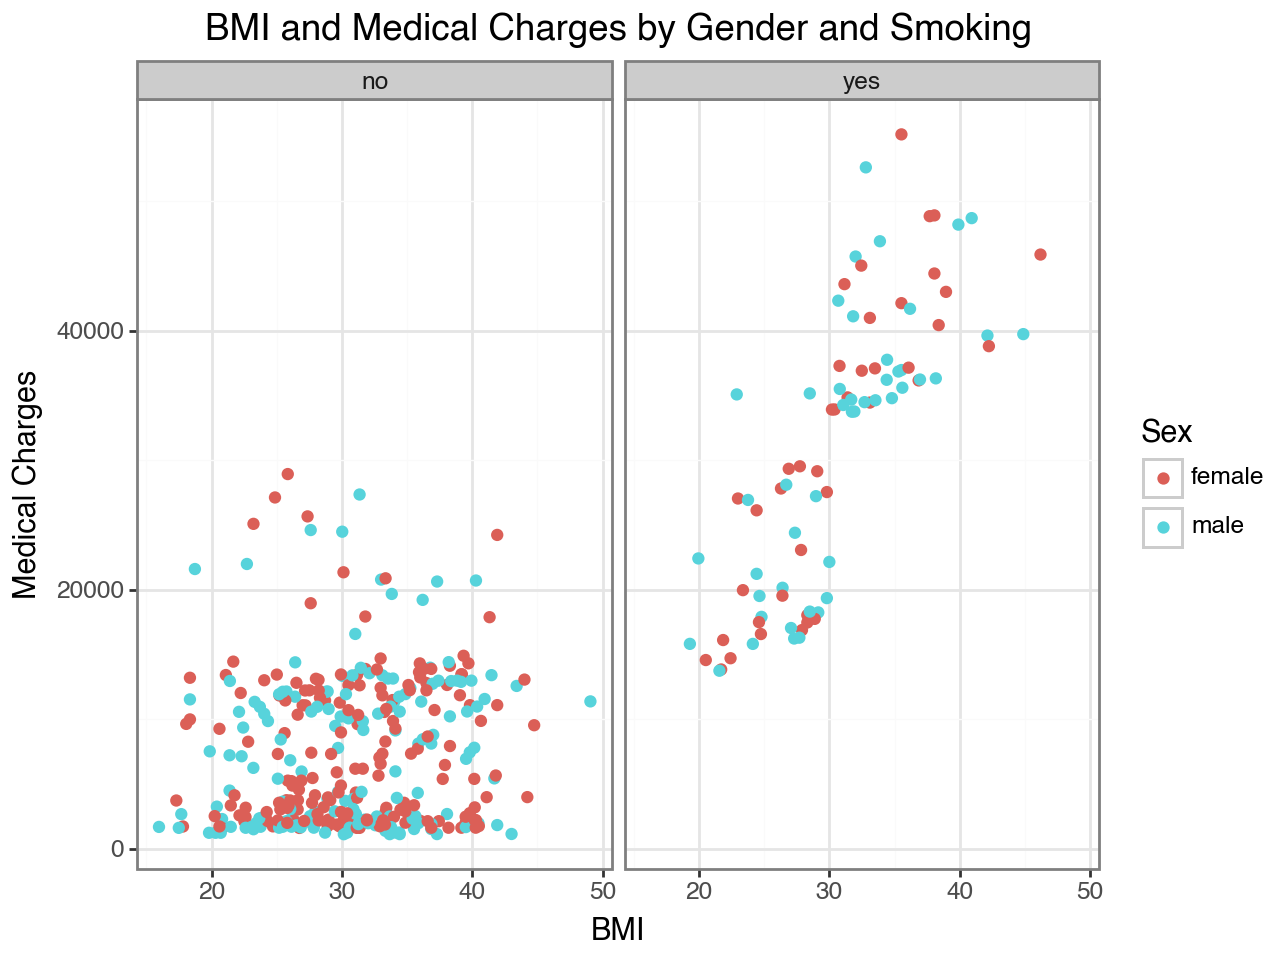

In [4]:
(ggplot(insurance, aes(x = "bmi", y = "charges", color = "sex"))
+ geom_point()
+ facet_wrap("~ smoker")
+ labs(x = "BMI", y = "Medical Charges", color = "Sex",
       title = "BMI and Medical Charges by Gender and Smoking")
+ theme_bw()
)

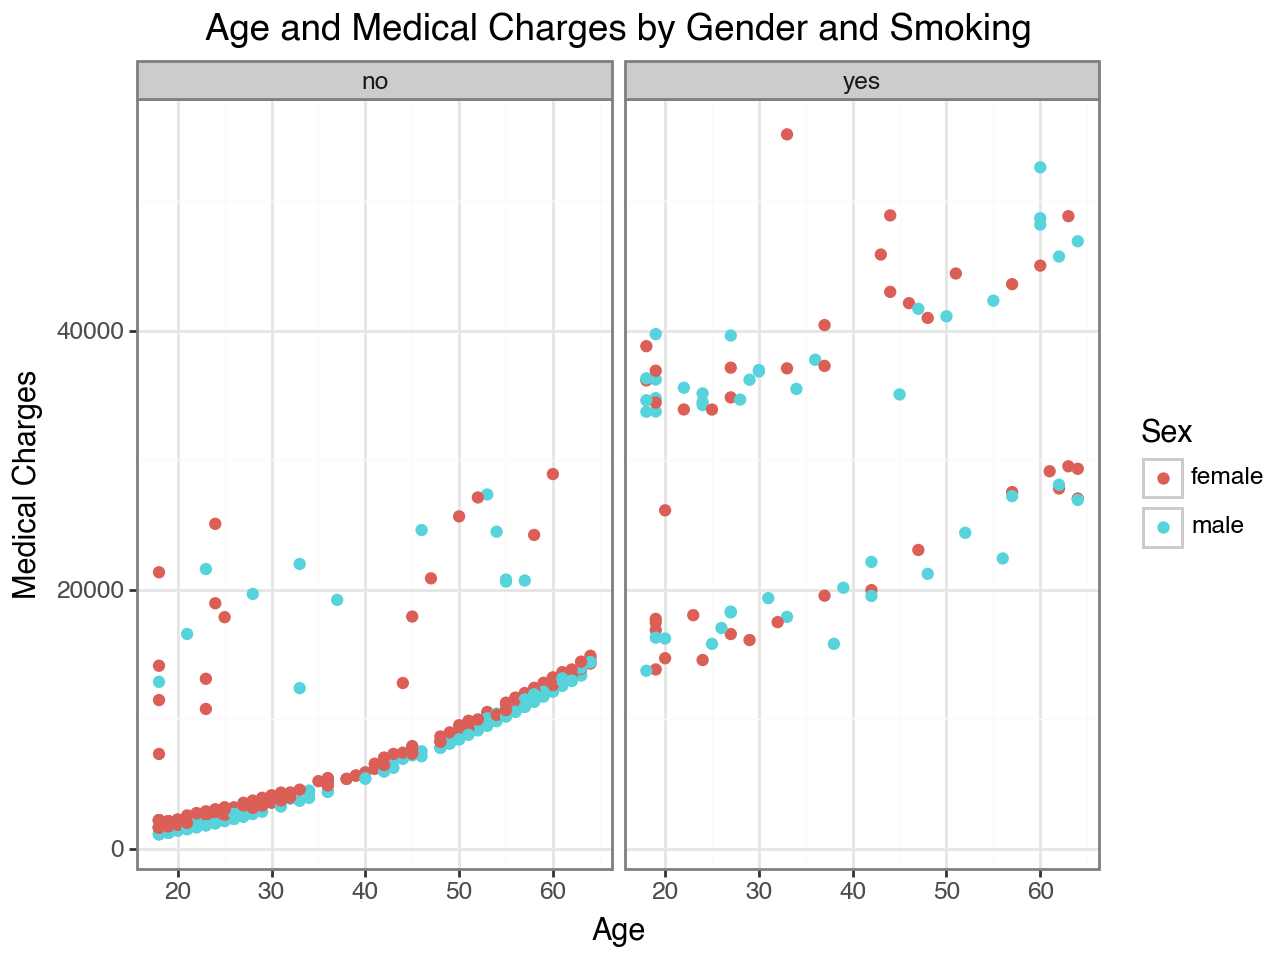

In [5]:
(ggplot(insurance, aes(x = "age", y = "charges", color = "sex"))
+ geom_point()
+ facet_wrap("~ smoker")
+ labs(x = "Age", y = "Medical Charges", color = "Sex",
       title = "Age and Medical Charges by Gender and Smoking")
+ theme_bw()
)

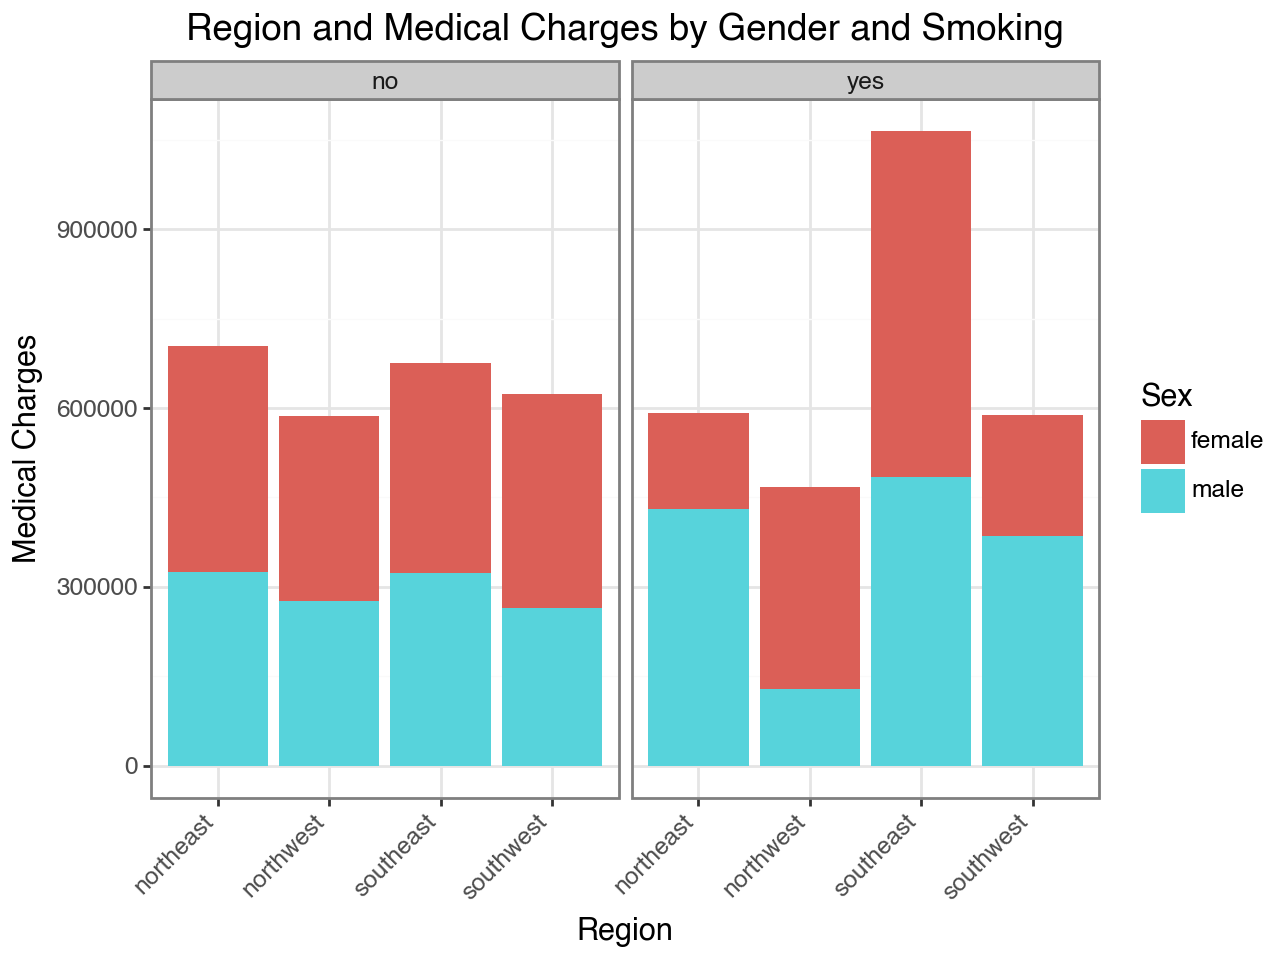

In [6]:
(ggplot(insurance, aes(x = "region", y = "charges", fill = "sex"))
+ geom_bar(stat = "identity")
+ facet_wrap("~ smoker")
+ labs(x = "Region", y = "Medical Charges", fill = "Sex",
       title = "Region and Medical Charges by Gender and Smoking")
+ theme_bw()
+ theme(axis_text_x=element_text(rotation=45, hjust=1))
)

# Part Two: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [9]:
# model 1
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr = LinearRegression()

lr_pipeline = Pipeline(
  [
  ("linear_regression", LinearRegression())]
)

lr_fitted = lr_pipeline.fit(X_train, y_train)


y_pred_test = lr_fitted.predict(X_test)
y_pred_train = lr_fitted.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rsquared_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rsquared_test = r2_score(y_test, y_pred_test)

print("Model 1:")
print("Intercept: ", lr_fitted.named_steps['linear_regression'].intercept_.__round__(2))
print("Coefficient: ", lr_fitted.named_steps['linear_regression'].coef_[0].__round__(2))
print("Train MSE:", mse_train.__round__(2))
print("Train R^2: ", rsquared_train.__round__(2))
print("Test MSE:", mse_test.__round__(2))
print("Test R^2: ", rsquared_test.__round__(2))

Model 1:
Intercept:  3769.22
Coefficient:  231.67
Train MSE: 136790047.54
Train R^2:  0.09
Test MSE: 87360446.32
Test R^2:  0.12
Model 1:
Intercept:  3769.22
Coefficient:  231.67
Train MSE: 136790047.54
Train R^2:  0.09
Test MSE: 87360446.32
Test R^2:  0.12


2. Make a model that also incorporates the variable sex. Report your results.

In [10]:
X = insurance[["age", "sex"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = "first"),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lr_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted1 = lr_pipeline1.fit(X_train, y_train)

y_pred_test1 = lr_pipeline1.predict(X_test)
y_pred_train1 = lr_pipeline1.predict(X_train)

mse_train1 = mean_squared_error(y_train, y_pred_train1)
rsquared_train1 = r2_score(y_train, y_pred_train1)

mse_test1 = mean_squared_error(y_test, y_pred_test1)
rsquared_test1 = r2_score(y_test, y_pred_test1)

print("Model 2 (Age and Sex)")
print("Coefficient for Sex: ", lr_fitted1.named_steps['linear_regression'].coef_[0].__round__(2))
print("Coefficient for Age: ", lr_fitted1.named_steps['linear_regression'].coef_[1].__round__(2))
print("Intercept: ", lr_fitted1.named_steps['linear_regression'].intercept_.__round__(2))
print("Train MSE:", mse_train1.__round__(2))
print("Train R^2: ", rsquared_train1.__round__(2))
print("Test MSE:", mse_test1.__round__(2))
print("Test R^2: ", rsquared_test1.__round__(2))


Model 2 (Age and Sex)
Coefficient for Sex:  936.42
Coefficient for Age:  231.51
Intercept:  3331.48
Train MSE: 136571435.09
Train R^2:  0.1
Test MSE: 87817757.43
Test R^2:  0.11
Model 2 (Age and Sex)
Coefficient for Sex:  936.42
Coefficient for Age:  231.51
Intercept:  3331.48
Train MSE: 136571435.09
Train R^2:  0.1
Test MSE: 87817757.43
Test R^2:  0.11


3. Now make a model that does not include sex, but does include smoker. Report your results.

In [11]:
X = insurance[["age", "smoker"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = "first"),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lr_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted2 = lr_pipeline2.fit(X_train, y_train)

y_pred_test2 = lr_pipeline2.predict(X_test)
y_pred_train2 = lr_pipeline2.predict(X_train)

mse_train2 = mean_squared_error(y_train, y_pred_train2)
rsquared_train2 = r2_score(y_train, y_pred_train2)

mse_test2 = mean_squared_error(y_test, y_pred_test2)
rsquared_test2 = r2_score(y_test, y_pred_test2)

print("Model 3 (Smoker and Age)")
print("Coefficient for Smoker: ", lr_fitted2.named_steps['linear_regression'].coef_[0].__round__(2))
print("Coefficient for Age: ", lr_fitted2.named_steps['linear_regression'].coef_[1].__round__(2))
print("Intercept: ", lr_fitted2.named_steps['linear_regression'].intercept_.__round__(2))
print("Train MSE:", mse_train2.__round__(2))
print("Train R^2: ", rsquared_train2.__round__(2))
print("Test MSE:", mse_test2.__round__(2))
print("Test R^2: ", rsquared_test2.__round__(2))


Model 3 (Smoker and Age)
Coefficient for Smoker:  25170.8
Coefficient for Age:  247.45
Intercept:  -1948.08
Train MSE: 34166961.28
Train R^2:  0.77
Test MSE: 33276382.05
Test R^2:  0.66
Model 3 (Smoker and Age)
Coefficient for Smoker:  25170.8
Coefficient for Age:  247.45
Intercept:  -1948.08
Train MSE: 34166961.28
Train R^2:  0.77
Test MSE: 33276382.05
Test R^2:  0.66


4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

# Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [12]:
X = insurance[["age", "bmi"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

lr_pipeline3 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted3 = lr_pipeline3.fit(X_train, y_train)

y_pred_test3 = lr_pipeline3.predict(X_test)
y_pred_train3 = lr_pipeline3.predict(X_train)

mse_train3 = mean_squared_error(y_train, y_pred_train3)
rsquared_train3 = r2_score(y_train, y_pred_train3)

mse_test3 = mean_squared_error(y_test, y_pred_test3)
rsquared_test3 = r2_score(y_test, y_pred_test3)

print("Model 4 (Age and BMI)")
print("Coefficient for Age: ", lr_fitted3.named_steps['linear_regression'].coef_[0].__round__(2))
print("Coefficient for BMI: ", lr_fitted3.named_steps['linear_regression'].coef_[1].__round__(2))
print("Intercept: ", lr_fitted3.named_steps['linear_regression'].intercept_.__round__(2))
print("Train MSE:", mse_train3.__round__(2))
print("Train R^2: ", rsquared_train3.__round__(2))
print("Test MSE:", mse_test3.__round__(2))
print("Test R^2: ", rsquared_test3.__round__(2))


Model 4 (Age and BMI)
Coefficient for Age:  213.52
Coefficient for BMI:  274.78
Intercept:  -4118.93
Train MSE: 133997790.55
Train R^2:  0.11
Test MSE: 83569014.93
Test R^2:  0.15
Model 4 (Age and BMI)
Coefficient for Age:  213.52
Coefficient for BMI:  274.78
Intercept:  -4118.93
Train MSE: 133997790.55
Train R^2:  0.11
Test MSE: 83569014.93
Test R^2:  0.15


2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [13]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
    transformers=[
        ("poly", PolynomialFeatures(degree = 2, include_bias=False), ["age"])
    ],
    remainder="drop"
).set_output(transform="pandas")

lr_pipeline4 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted4 = lr_pipeline4.fit(X_train, y_train)

y_pred_test4 = lr_pipeline4.predict(X_test)
y_pred_train4 = lr_pipeline4.predict(X_train)

mse_train4 = mean_squared_error(y_train, y_pred_train4)
rsquared_train4 = r2_score(y_train, y_pred_train4)

mse_test4 = mean_squared_error(y_test, y_pred_test4)
rsquared_test4 = r2_score(y_test, y_pred_test4)

print("Model 5 (Age and Age^2 Model)")
print("Coefficient for Age: ", lr_fitted4.named_steps['linear_regression'].coef_[0].__round__(2))
print("Coefficient for Age^2: ", lr_fitted4.named_steps['linear_regression'].coef_[1].__round__(2))
print("Intercept: ", lr_fitted4.named_steps['linear_regression'].intercept_.__round__(2))
print("Train MSE:", mse_train4.__round__(2))
print("Train R^2: ", rsquared_train4.__round__(2))
print("Test MSE:", mse_test4.__round__(2))
print("Test R^2: ", rsquared_test4.__round__(2))


Model 5 (Age and Age^2 Model)
Coefficient for Age:  218.86
Coefficient for Age^2:  0.16
Intercept:  3979.93
Train MSE: 136789294.88
Train R^2:  0.09
Test MSE: 87413315.31
Test R^2:  0.12
Model 5 (Age and Age^2 Model)
Coefficient for Age:  218.86
Coefficient for Age^2:  0.16
Intercept:  3979.93
Train MSE: 136789294.88
Train R^2:  0.09
Test MSE: 87413315.31
Test R^2:  0.12


3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [14]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
    transformers=[
        ("poly", PolynomialFeatures(degree = 4, include_bias=False), ["age"])
    ],
    remainder="drop"
).set_output(transform="pandas")

lr_pipeline5 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted5 = lr_pipeline5.fit(X_train, y_train)

y_pred_test5 = lr_pipeline5.predict(X_test)
y_pred_train5 = lr_pipeline5.predict(X_train)

mse_train5 = mean_squared_error(y_train, y_pred_train5)
rsquared_train5 = r2_score(y_train, y_pred_train5)

mse_test5 = mean_squared_error(y_test, y_pred_test5)
rsquared_test5 = r2_score(y_test, y_pred_test5)

print("Model 6 (Degree 4 Polynomial)")
print("Coefficient for Age: ", lr_fitted5.named_steps['linear_regression'].coef_[0].__round__(2))
print("Coefficient for Age^2: ", lr_fitted5.named_steps['linear_regression'].coef_[1].__round__(2))
print("Coefficient for Age^3: ", lr_fitted5.named_steps['linear_regression'].coef_[2].__round__(2))
print("Coefficient for Age^4: ", lr_fitted5.named_steps['linear_regression'].coef_[3].__round__(2))
print("Intercept: ", lr_fitted5.named_steps['linear_regression'].intercept_.__round__(2))
print("Train MSE:", mse_train5.__round__(2))
print("Train R^2: ", rsquared_train5.__round__(2))
print("Test MSE:", mse_test5.__round__(2))
print("Test R^2: ", rsquared_test5.__round__(2))


Model 6 (Degree 4 Polynomial)
Coefficient for Age:  -8187.23
Coefficient for Age^2:  359.32
Coefficient for Age^3:  -6.38
Coefficient for Age^4:  0.04
Intercept:  72752.56
Train MSE: 135773899.3
Train R^2:  0.1
Test MSE: 85868140.4
Test R^2:  0.13
Model 6 (Degree 4 Polynomial)
Coefficient for Age:  -8187.23
Coefficient for Age^2:  359.32
Coefficient for Age^3:  -6.38
Coefficient for Age^4:  0.04
Intercept:  72752.56
Train MSE: 135773899.3
Train R^2:  0.1
Test MSE: 85868140.4
Test R^2:  0.13


4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [15]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
    transformers=[
        ("poly", PolynomialFeatures(degree = 12, include_bias=False), ["age"])
    ],
    remainder="drop"
).set_output(transform="pandas")

lr_pipeline6 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted6 = lr_pipeline6.fit(X_train, y_train)

y_pred_test6 = lr_pipeline6.predict(X_test)
y_pred_train6 = lr_pipeline6.predict(X_train)

mse_train6 = mean_squared_error(y_train, y_pred_train6)
rsquared_train6 = r2_score(y_train, y_pred_train6)

mse_test6 = mean_squared_error(y_test, y_pred_test6)
rsquared_test6 = r2_score(y_test, y_pred_test6)

age_coef = lr_fitted6.named_steps['linear_regression'].coef_

print("Model 7 (Degree 12 Polynomial)")
print("Intercept: ", lr_fitted6.named_steps['linear_regression'].intercept_.__round__(4))
for i, coef in enumerate(age_coef):
    degree = i + 1
    print(f"Coefficient for Age ^ {degree}: {coef:.2f}")

print("Train MSE:", mse_train6.__round__(2))
print("Train R^2: ", rsquared_train6.__round__(2))
print("Test MSE:", mse_test6.__round__(2))
print("Test R^2: ", rsquared_test6.__round__(2))


Model 7 (Degree 12 Polynomial)
Intercept:  5772.7274
Coefficient for Age ^ 1: 0.00
Coefficient for Age ^ 2: -0.00
Coefficient for Age ^ 3: 0.00
Coefficient for Age ^ 4: 0.00
Coefficient for Age ^ 5: 0.00
Coefficient for Age ^ 6: 0.00
Coefficient for Age ^ 7: -0.00
Coefficient for Age ^ 8: 0.00
Coefficient for Age ^ 9: -0.00
Coefficient for Age ^ 10: 0.00
Coefficient for Age ^ 11: -0.00
Coefficient for Age ^ 12: 0.00
Train MSE: 135081654.21
Train R^2:  0.11
Test MSE: 90977658.49
Test R^2:  0.08
Model 7 (Degree 12 Polynomial)
Intercept:  5772.7274
Coefficient for Age ^ 1: 0.00
Coefficient for Age ^ 2: -0.00
Coefficient for Age ^ 3: 0.00
Coefficient for Age ^ 4: 0.00
Coefficient for Age ^ 5: 0.00
Coefficient for Age ^ 6: 0.00
Coefficient for Age ^ 7: -0.00
Coefficient for Age ^ 8: 0.00
Coefficient for Age ^ 9: -0.00
Coefficient for Age ^ 10: 0.00
Coefficient for Age ^ 11: -0.00
Coefficient for Age ^ 12: 0.00
Train MSE: 135081654.21
Train R^2:  0.11
Test MSE: 90977658.49
Test R^2:  0.08


5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

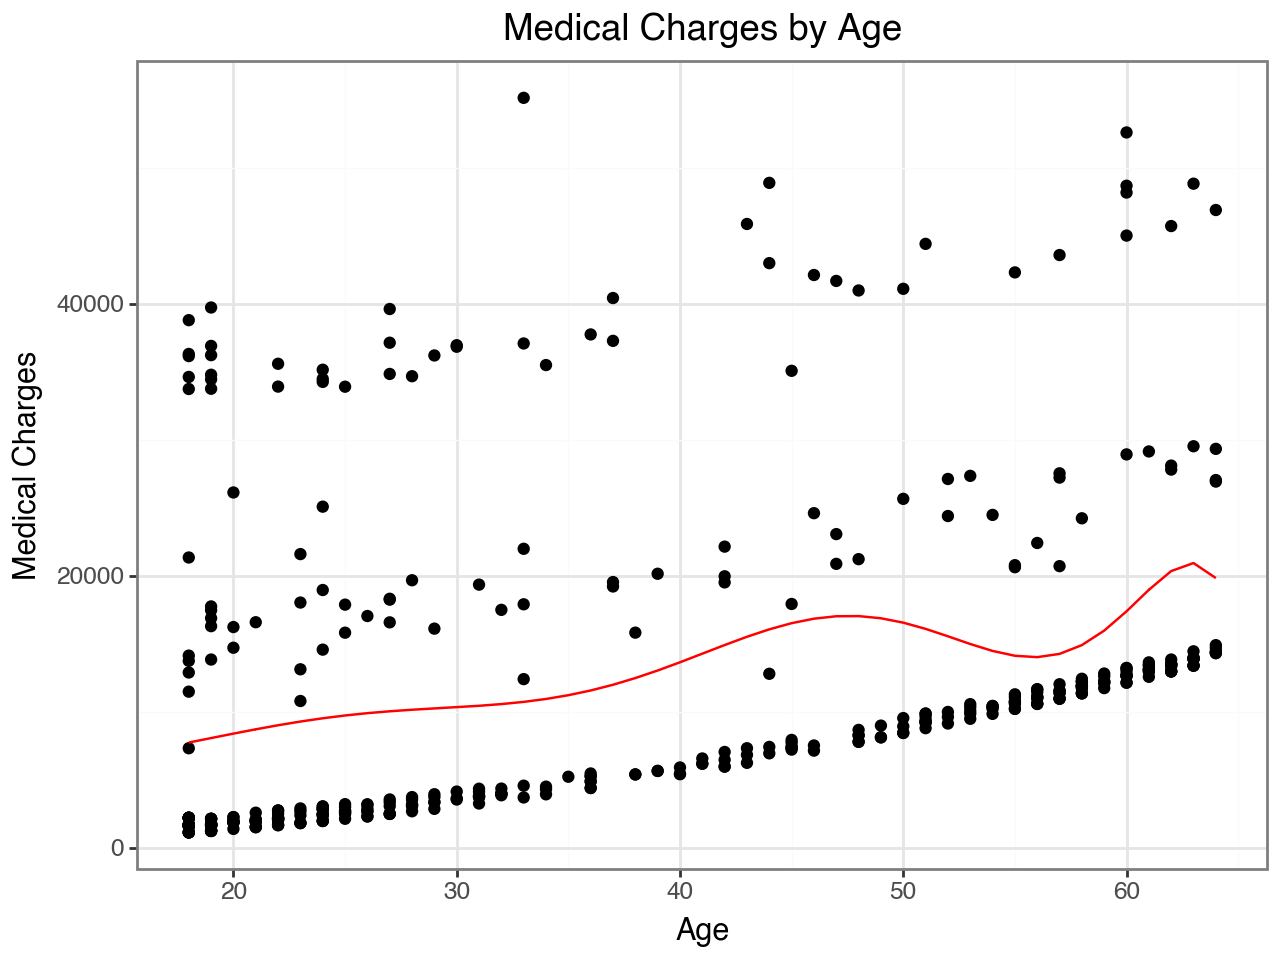

In [16]:
plot_data = pd.DataFrame({
    "age": X["age"],
    "charges": y,
    "predicted": lr_pipeline6.predict(X)
})

(ggplot(plot_data, aes(x = "age", y = "charges"))
+ geom_point()
+ geom_line(aes(y = "predicted"), color = "red")
+ labs(x = "Age", y = "Medical Charges", title = "Medical Charges by Age")
+ theme_bw()
)

# Part Four: New Data

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

* Only age as a predictor.

* age and bmi as a predictor.

* age, bmi, and smoker as predictors (no interaction terms)

* age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

* age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)


For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [17]:
insurance_new = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

### Model 1: Only age as a predictor

In [18]:
X = insurance_new[["age"]]
y = insurance_new["charges"]
y_pred_new = lr_fitted.predict(X)
mse_new = mean_squared_error(y, y_pred_new)

print("Model 1 (age only)")
print("MSE new:", mse_new.__round__(2))


Model 1 (age only)
MSE new: 136186450.84
Model 1 (age only)
MSE new: 136186450.84


### Model 2: age and bmi as a predictor

In [19]:
X = insurance_new[["age", "bmi"]]
y = insurance_new["charges"]
y_pred_new3 = lr_fitted3.predict(X)
mse_new3 = mean_squared_error(y, y_pred_new3)

print("Model 2 (age and bmi)")
print("MSE new:", mse_new3.__round__(2))

Model 2 (age and bmi)
MSE new: 132735990.21
Model 2 (age and bmi)
MSE new: 132735990.21


### Model 3: age, bmi, and smoker as a predictor

In [20]:
X = insurance[["age", "smoker", "bmi"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = "first"),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lr_pipeline7 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted7 = lr_pipeline7.fit(X_train, y_train)

X = insurance_new[["age", "smoker", "bmi"]]
y = insurance_new["charges"]

y_pred_new7 = lr_fitted7.predict(X)
mse_new7 = mean_squared_error(y, y_pred_new7)

print("Model 3 (age, smoker, and bmi)")
print("MSE new:", mse_new7.__round__(2))

Model 3 (age, smoker, and bmi)
MSE new: 35790047.17
Model 3 (age, smoker, and bmi)
MSE new: 35790047.17


### Model 4: age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [21]:
X = insurance[["age", "smoker", "bmi"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = "first"),
    ["smoker"])
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

ct_inter = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)

lr_pipeline8 = Pipeline(
  [("preprocessing", ct),
  ("interaction", ct_inter),
  ("linear_regression", LinearRegression())]
)

lr_fitted8 = lr_pipeline8.fit(X_train, y_train)

X = insurance_new[["age", "smoker", "bmi"]]
y = insurance_new["charges"]

y_pred_new8 = lr_fitted8.predict(X)
mse_new8 = mean_squared_error(y, y_pred_new8)

print("Model 4 (age, smoker, and bmi with interactions)")
print("MSE new:", mse_new8.__round__(2))

Model 4 (age, smoker, and bmi with interactions)
MSE new: 21844434.59
Model 4 (age, smoker, and bmi with interactions)
MSE new: 21844434.59


### Model 5: age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [22]:
X = insurance[["age", "smoker", "bmi"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = "first"),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

ct_inter = PolynomialFeatures( include_bias=False)

lr_pipeline9 = Pipeline(
  [("preprocessing", ct),
  ("interaction", ct_inter),
  ("linear_regression", LinearRegression())]
)

lr_fitted9 = lr_pipeline9.fit(X_train, y_train)

X = insurance_new[["age", "smoker", "bmi"]]
y = insurance_new["charges"]

y_pred_new9 = lr_fitted9.predict(X)
mse_new9 = mean_squared_error(y, y_pred_new9)

print("Model 5 (age, smoker, and bmi with interactions)")
print("MSE new:", mse_new9.__round__(2))

Model 5 (age, smoker, and bmi with interactions)
MSE new: 21656457.87
Model 5 (age, smoker, and bmi with interactions)
MSE new: 21656457.87


In [23]:
# print all MSEs

print("Model 1 MSE: ", mse_new)
print("Model 2 MSE: ", mse_new3)
print("Model 3 MSE: ", mse_new7)
print("Model 4 MSE: ", mse_new8)
print("Model 5 MSE: ", mse_new9)

Model 1 MSE:  136186450.83862
Model 2 MSE:  132735990.20716713
Model 3 MSE:  35790047.17021463
Model 4 MSE:  21844434.588160772
Model 5 MSE:  21656457.866372813
Model 1 MSE:  136186450.83862
Model 2 MSE:  132735990.20716713
Model 3 MSE:  35790047.17021463
Model 4 MSE:  21844434.588160772
Model 5 MSE:  21656457.866372813


Based on the MSE's above, the best model is Model 5, as it has the smallest MSE. 

/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 288 rows containing missing values.


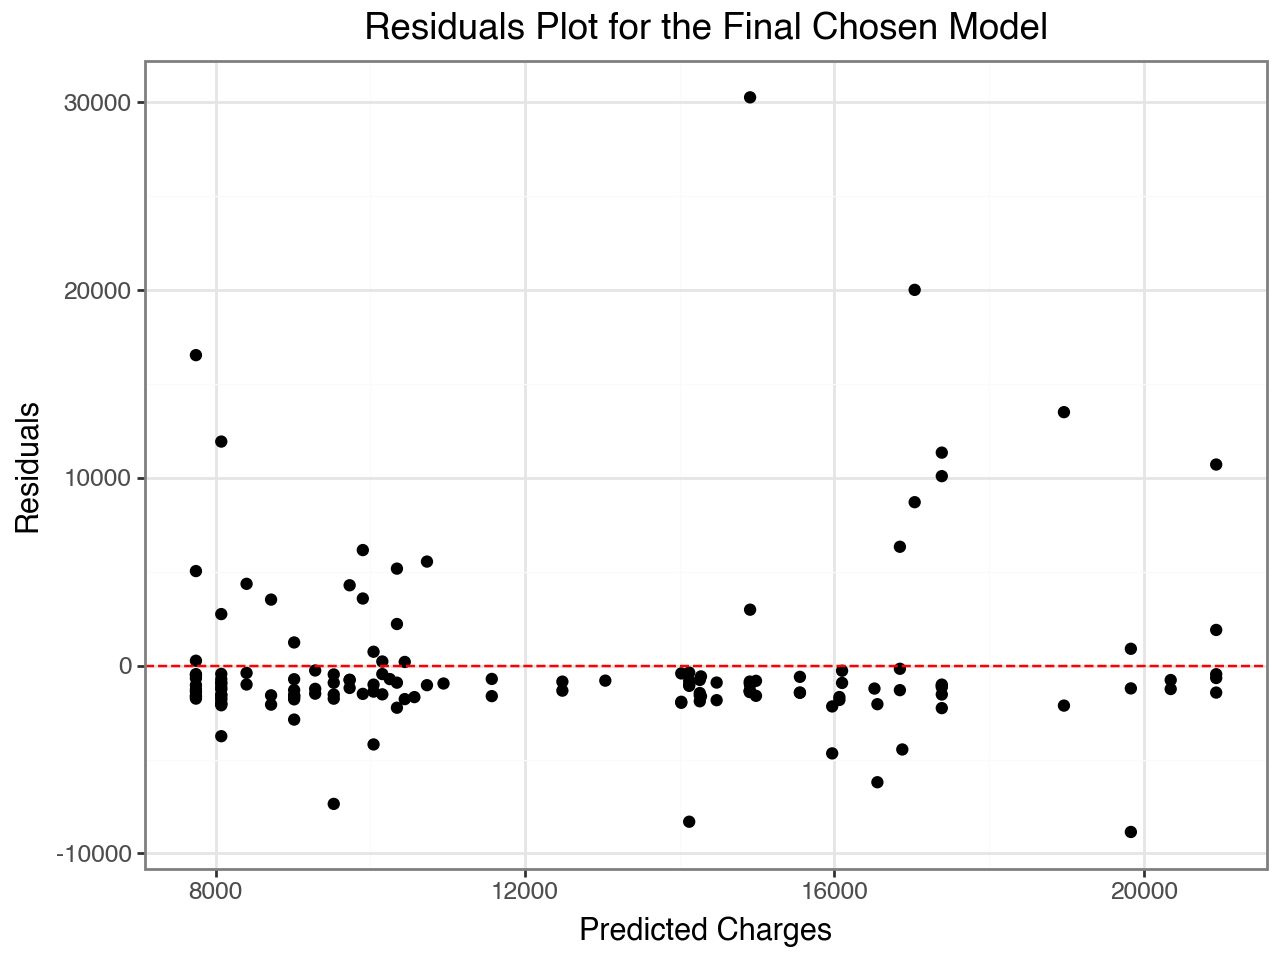

In [26]:
# residuals plot with model 5

X = insurance_new[["age", "smoker", "bmi"]]
y = insurance_new["charges"]

# calculate predicted
predicted = lr_fitted9.predict(X)

# calculate residuals
residuals = y - y_pred_new9



residual_data = pd.DataFrame({
    "predicted": predicted,
    "residuals": residuals
})

(ggplot(plot_data, aes(x='predicted', y='residuals'))
                  + geom_point()
                  + geom_hline(yintercept=0, color='red', linetype='dashed')
                  + labs(x='Predicted Charges', y='Residuals', title='Residuals Plot for the Final Chosen Model')
                  + theme_bw()
)